<a href="https://colab.research.google.com/github/harnalashok/deeplearning-sequences/blob/main/kingMinusWoman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Last amended: 10th Sep, 2021
Folder: C:\Users\ashok\OneDrive\Documents\bagOfWordsMeetsBagofPopcorn\smallexpt
	    	/home/ashok/Documents/9.word2vec

Google word2vec slim
        https://github.com/eyaler/word2vec-slim


Kaggle:
    https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-2-word-vectors

Analytics Vidhya:    
    https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
    
Objective:
    Experimentation with pre-created word2vec file
    Works with gensim >= 4.0
    
"""

In [ ]:
# 0.0 Install gensim and bug-free numpy
! pip install gensim==4.1.0 
! pip install numpy==1.20.1

## Call Libraries

In [1]:
# 1.0 Reset variables. Import module to manipulate word2vec files
#%reset -f
# conda install -c anaconda gensim
# conda installs an older version of gensim
import gensim
from gensim.models.keyedvectors import KeyedVectors
import os
gensim.__version__   # 4.1.0

'4.1.0'

In [3]:
# 1.0.1 Mount google drive to access
#       word2vec file from my gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


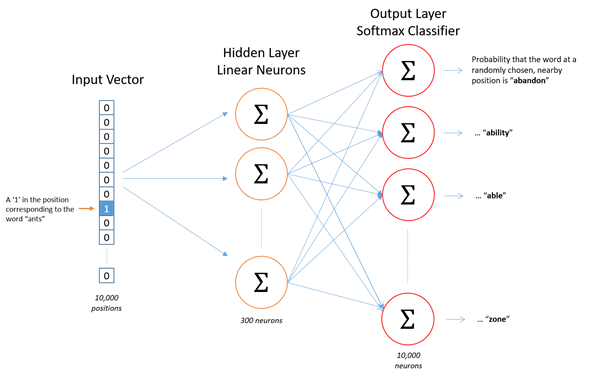

One Hots allow us to activate only one input neuron at once. So the representation of the word falls down to specific weights just for that word. Here, the one hot for 'juice' is activating just 4 synaptic links per synapse.

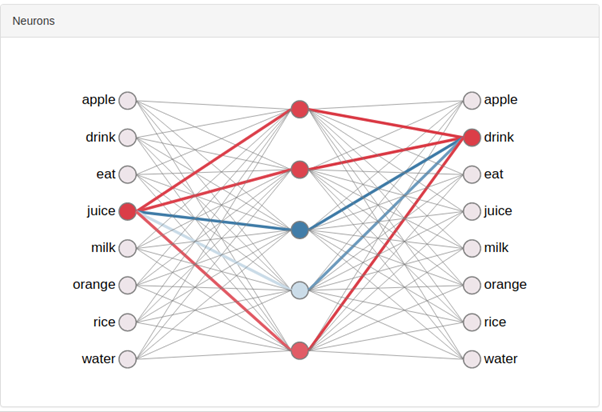

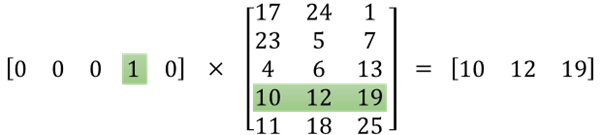

In [ ]:
# 2.0 Download vector model. Takes time
#     But even if part is downloaded, it will work
#     Downloaded model is in memory NOT on disk

# model = api.load('word2vec-google-news-300')

In [ ]:
# 2.1 Else, mount gdrive and set path 
#     to Google word2vec (slim) file 
#     This slim file is available at:
#     https://github.com/eyaler/word2vec-slim/blob/master/GoogleNews-vectors-negative300-SLIM.bin.gz
#

In [4]:
# 3. Else, set path to Kaggle's word2vec file folder
#    In your gdrive (bagofpopcorn):

os.chdir("/content/drive/MyDrive/Colab_data_files/word2vec/")

In [5]:
# 4.0 Load the word2vec file
#    (takes time)
#     Refer bagofpopcorn.py. This file was created by Ashok K Harnal
#      File size is around 59MB
model =   KeyedVectors.load('300features_40minwords_10context.gz', mmap = None)


In [ ]:
# 4.0.1 Have a look at operators available
#       Press tab to have a look.
model.wv.

In [7]:
# 4.1
model.wv.doesnt_match("man woman child kitchen".split())   # 'kitchen'

'kitchen'

In [8]:
# 4.1.1
model.wv.doesnt_match("man woman child cow".split())   # cow


'cow'

In [9]:
#4.1.2 
model.wv.doesnt_match("france england germany berlin".split())   # berlin


'berlin'

In [10]:
# 4.1.3
model.wv.doesnt_match("paris berlin london austria".split())   # austria


'paris'

In [11]:
# 4.1.4
model.wv.most_similar("man")  


[('woman', 0.6254014372825623),
 ('lad', 0.5897815227508545),
 ('lady', 0.5896257162094116),
 ('soldier', 0.5538835525512695),
 ('guy', 0.5263450741767883),
 ('men', 0.5252613425254822),
 ('person', 0.5234428644180298),
 ('businessman', 0.5173948407173157),
 ('monk', 0.5137553811073303),
 ('loner', 0.5119930505752563)]

In [12]:
# 4.1.5
model.wv.most_similar("queen")

[('princess', 0.6680407524108887),
 ('bride', 0.6045001149177551),
 ('stepmother', 0.5974058508872986),
 ('victoria', 0.5969752073287964),
 ('dame', 0.5853109359741211),
 ('showgirl', 0.5819121599197388),
 ('maria', 0.5809970498085022),
 ('latifah', 0.5800352692604065),
 ('eva', 0.5745376944541931),
 ('anita', 0.5699288845062256)]

In [ ]:
# 4.1.6
model.wv.most_similar("awful")

[('terrible', 0.773497462272644),
 ('atrocious', 0.726247251033783),
 ('dreadful', 0.7210407853126526),
 ('horrible', 0.7197018265724182),
 ('abysmal', 0.7099337577819824),
 ('horrendous', 0.6860306859016418),
 ('horrid', 0.6697106957435608),
 ('appalling', 0.6539225578308105),
 ('amateurish', 0.6097128987312317),
 ('lousy', 0.6085333824157715)]

In [ ]:
# 4.1.7
model.wv.most_similar("bank")     # 'bank' has two meanings. River bank. Finance bank.


[('robbery', 0.6693954467773438),
 ('ranch', 0.6567532420158386),
 ('loan', 0.6546927690505981),
 ('robbers', 0.6538708806037903),
 ('cattle', 0.6504669785499573),
 ('security', 0.6486033201217651),
 ('loot', 0.6473209857940674),
 ('factory', 0.6468525528907776),
 ('robber', 0.6461599469184875),
 ('nearby', 0.6442009806632996)]

#### Maths with word2vec model. Two vectors get added and one subtracted.
King – Man + Woman = ?

In [ ]:
# 5.0 Get vectors of few words
vec_king =  model.wv['king']
vec_man =   model.wv['man']
vec_woman = model.wv['woman']
vec_queen = model.wv['queen']

In [13]:
# 5.1
result = model.wv.most_similar(
                               positive=['woman', 'king'],
                               negative=['man'],
                               topn=1
                               )
print(result)

[('queen', 0.5817553997039795)]


In [14]:
# 5.2
result = model.wv.most_similar(
                                positive=['woman', 'king'],
                                negative=['man'],
                                topn=3
                               )

print(result)

[('queen', 0.5817553997039795), ('princess', 0.5068495273590088), ('prince', 0.4993061423301697)]


In [15]:
# 5.3
model.wv.most_similar(
                       positive=[ 'king'],
                       negative=['woman']
                      )

[('stephen', 0.44891202449798584),
 ('iii', 0.43700486421585083),
 ('hong', 0.41367438435554504),
 ('kings', 0.4029046893119812),
 ('conan', 0.4006439447402954),
 ('doyle', 0.4003871977329254),
 ('solomon', 0.39914470911026),
 ('lotr', 0.3912689685821533),
 ('luther', 0.3862456679344177),
 ('fleischer', 0.38413700461387634)]

In [16]:
# 5.4
result = model.wv.most_similar(
                                positive=['woman', 'uncle'],
                                negative=['man'],
                                topn=1
                               )
print(result)

[('aunt', 0.7528471350669861)]


In [ ]:
#################### I am done #####################